#**WordPiece Algorithm:**

The WordPiece Algorithm is a tokenizer algorithm development by google to pre-train BERT (Bidirectional Encoder Representation Transformer).

The source code of this algorithm was never post by google.![wordpiece.png](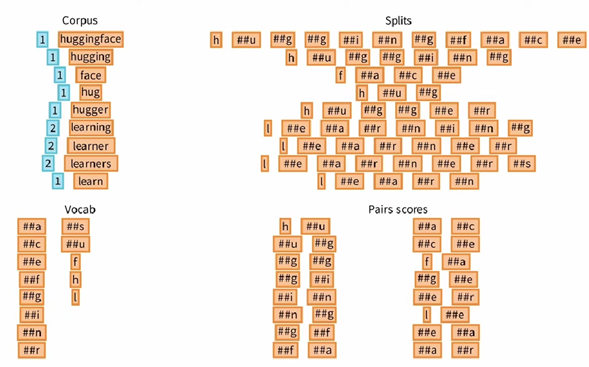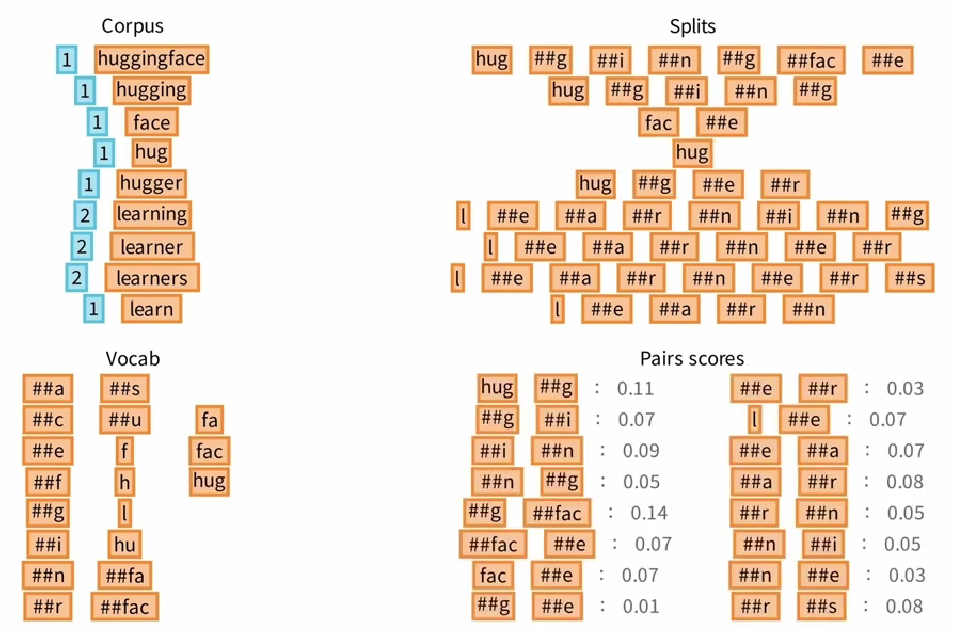)

**Strategy:**

1. They begin with a initial vocabulary.
2. They split every word of that vocabulary in the sequence of letters that make it up (Adding ## to every letter doesn´t start a word).

3. So that with the unique splits they begin a new vocabulary.
4. After, they extract all the unique pairs of words of the splits.

5. After we will calculate a score for every unique pair of words, throught the next form:

\begin{equation}
pair_score=\frac{freq_of_pair}{freq_first_element * freq_second_element}
\end{equation}

**Notice that if the freq of every individual words is hight, then the score is low, but if the req of the pair is hight, the score will be hight.**






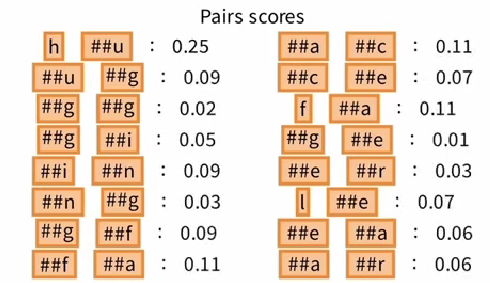

6. After we add the pair with the pair with the higher socre to the new vocabulary and to the splits.

So that this would be the result of the new vocabulary after multiples iterations:

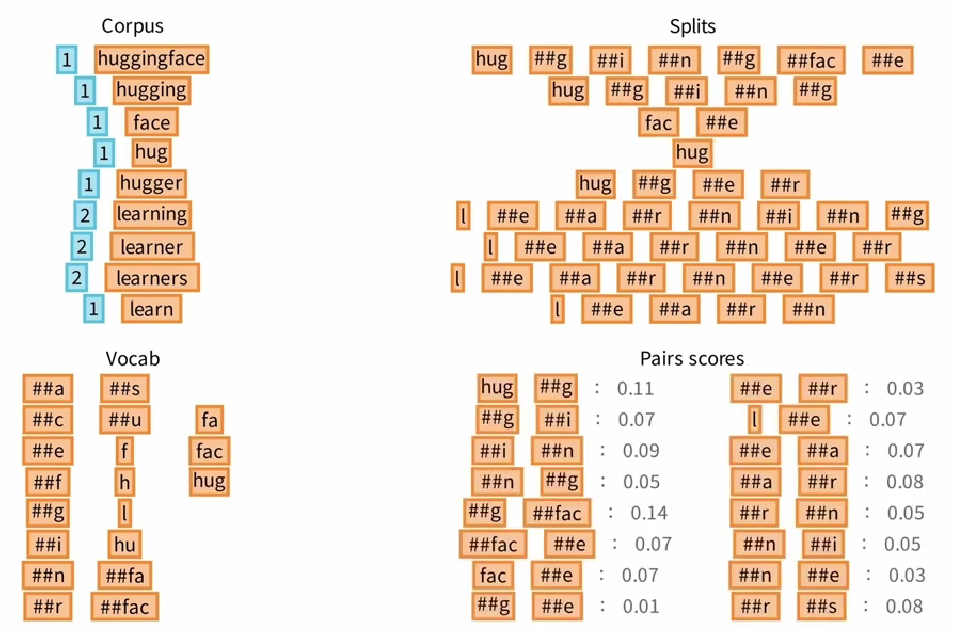

7. They repeat the same experiment until get a vocabulary of the wish size.

8. Get the tokenizacion of the words (For example if we want to get the tokenization of the word "huggingface"), we begin to search the longer tokens of every part of the word in the vocabulary, this from left to right. In this case the word is made it up by 4 sub-tokens.

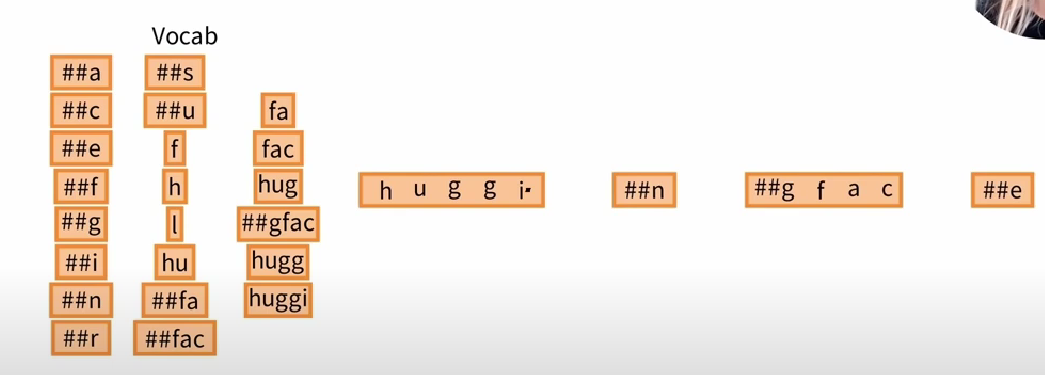

#**How carry this to Numbers/Vectors:**

First,  every token or subtoken of the vocabulary is represented by a unique id:

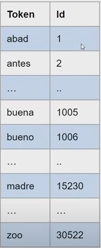

Yet I don´t know how they assign this id to every token or subtoken (**Morfemas**), but this is the order in the which google assigned this to its vocabulary: [BERT base vocabulary](https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt)

**Ex:**

In [ ]:
!pip install -q transformers

In [ ]:
from transformers import BertTokenizer
bert_tokenizer=BertTokenizer.from_pretrained("bert-base-multilingual-uncased") #Load the BERT tokenizer in its version multilingual base (It knows multiples idioms)

In [ ]:
text="El metaverso es una realidad digital"

In [ ]:
bert_tokenizer.tokenize(text)

['el', 'meta', '##verso', 'es', 'una', 'realidad', 'digital']

As we can see, it divide the sentence in tokens or subtokens (And this is the advantage of this, with the subtokens it can build any word althougt it word is not in the vocabulary). For example in this case the word "metaverse" is not in the vocabulary, but it builds with the sub-tokens of the vocabulary.

In [ ]:
bert_tokenizer(text).input_ids

[101, 10117, 16650, 78426, 10153, 10155, 35781, 10764, 102]

As we can see, to every token or subtoken is assigned an id. In the init, is the special token **[CLS]-101**, to indicate that a sequenece begins and in the final, is the special token **[SEP]-102**, to indicate that a sequence ends or the separation between to sentences.

In [ ]:
bert_tokenizer.convert_ids_to_tokens([16650,78426]) #Convert ids to tokens/subtokens

['meta', '##verso']

#**Input_ids, toke_type_ids, attention_mask:**

**Input_ids** is simple the id assigned to every token or sub-token.

In [ ]:
s1="Hoy es Miércoles"
s2="Mí día favorito es el viernes"

encoded=bert_tokenizer(s1,s2)

print("input_ids:",encoded.input_ids)
print("token_type_ids:",encoded.token_type_ids)
print("attention_mask:",encoded.attention_mask)

input_ids: [101, 21150, 10153, 95096, 66849, 11300, 102, 11793, 10604, 19266, 12875, 10153, 10117, 94953, 102]
token_type_ids: [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
attention_mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


**token_type_ids** is to inidicate to what sentence belong every token or subtoken. In this case we can see what tokens belong to every sentence. This is useful for example in EQA tasks, to indicate what tokens belong to the question and what tokens belong to the context.

#**Padding and Truncation:**

This is to guarante that all the inputs have the same size (In my task and in my application that all the inputs are vectors of 768 dimensions).

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
data=load_dataset("rotten_tomatoes",split="train[0:10]") #Load an example dataset

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [ ]:
data[2]["text"]

'effective but too-tepid biopic'

In [ ]:
data[4]["text"]

"emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one ."

In [ ]:
encoded=bert_tokenizer(data["text"])

print("input_ids:",encoded.input_ids)
print("token_type_ids:",encoded.token_type_ids)
print("attention_mask:",encoded.attention_mask)

input_ids: [[101, 10103, 11202, 10127, 64211, 10163, 10114, 10346, 10103, 38072, 11516, 112, 161, 10246, 107, 41160, 107, 10110, 10203, 10191, 112, 161, 17010, 10114, 12696, 143, 15931, 32504, 12818, 18860, 10948, 17981, 53257, 81919, 117, 10867, 118, 33631, 72035, 10147, 86779, 10111, 10362, 17953, 34024, 10159, 119, 102], [101, 10103, 67396, 50162, 83914, 95758, 11210, 10108, 107, 10103, 13360, 10108, 10103, 41851, 107, 58691, 10127, 10297, 37985, 10203, 143, 36241, 10108, 18281, 25004, 10816, 10111, 61420, 10563, 30013, 10348, 118, 16726, 120, 11866, 11047, 13369, 112, 161, 25312, 17584, 10108, 152, 119, 160, 119, 160, 119, 44935, 112, 161, 13470, 118, 10204, 119, 102], [101, 24300, 10502, 14666, 118, 10238, 69679, 12225, 29877, 102], [101, 11526, 10855, 16933, 11531, 10114, 11335, 10114, 10103, 25194, 10114, 10574, 22271, 117, 10140, 64246, 10127, 143, 12050, 11125, 10114, 13982, 119, 102], [101, 73518, 10107, 10146, 19501, 21315, 117, 10144, 14709, 13113, 10203, 112, 161, 10297, 1

In [ ]:
print("número de textos:",len(data))
print("número de vectores en input_ids:",len(encoded.input_ids))
print("número de vectores en token_type_ids:",len(encoded.token_type_ids))
print("número de vectores en attention_mask:",len(encoded.attention_mask))

número de textos: 10
número de vectores en input_ids: 10
número de vectores en token_type_ids: 10
número de vectores en attention_mask: 10


In [ ]:
sizes=[]
for i,id in enumerate(encoded.input_ids):
  print(f"número de tokens en el texto {i}:",len(id))
  sizes.append(len(id))

número de tokens en el texto 0: 48
número de tokens en el texto 1: 56
número de tokens en el texto 2: 10
número de tokens en el texto 3: 24
número de tokens en el texto 4: 30
número de tokens en el texto 5: 32
número de tokens en el texto 6: 11
número de tokens en el texto 7: 23
número de tokens en el texto 8: 38
número de tokens en el texto 9: 20


As we can see every text has a different size, we don´t want that.

**¿Cómo podemos conseguir que todos los textos tengan el mismo tamaño (número de tokens):**

For this is important study the texts of our database of application, to choose the max dimension and therefore the dimension of all the inputs of our database. This is important to don´t have to have much memory in our machines.
But this dimension has to guarantee the next:

\begin{equation}
dv=d/h
\end{equation}

where d is the dimension of the input vectors, h is the number of heads of the transformer and dv is the number of columns of the matrix $V \in \mathbb{R}^{d \times dv}$ in every head. it means that d should be a entire multiple of the humber of attention heads (h). We are going to undertand why this when we study the concept of multihead attention.

In [ ]:
import pandas as pd

s=pd.Series(sizes)
print("Estadistica del tamaño de los textos (número de tokens):")
s.describe()

Estadistica del tamaño de los textos (número de tokens):


count    10.000000
mean     29.200000
std      14.935417
min      10.000000
25%      20.750000
50%      27.000000
75%      36.500000
max      56.000000
dtype: float64

In this case for example we would should choose a size of 56.

#**Padding:**

The padding consist in add a special token to the embedding to the final to reach the wish size embedding (d), that special token is with id=0; because this id is not in the original vocabulary.

**Truncation:**

The truncation consist in drop the last tokens to the embedding to reach the wish size embedding (d); we have to be carefull for don´t loss many tokens of our texts; for this is important know to choose **d** agree to our application or database.

In [ ]:
batch=bert_tokenizer(data["text"],max_length=20, padding=True, truncation=True, return_tensors="pt")

In [ ]:
batch["input_ids"]

tensor([[  101, 10103, 11202, 10127, 64211, 10163, 10114, 10346, 10103, 38072,
         11516,   112,   161, 10246,   107, 41160,   107, 10110, 10203,   102],
        [  101, 10103, 67396, 50162, 83914, 95758, 11210, 10108,   107, 10103,
         13360, 10108, 10103, 41851,   107, 58691, 10127, 10297, 37985,   102],
        [  101, 24300, 10502, 14666,   118, 10238, 69679, 12225, 29877,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
        [  101, 11526, 10855, 16933, 11531, 10114, 11335, 10114, 10103, 25194,
         10114, 10574, 22271,   117, 10140, 64246, 10127,   143, 12050,   102],
        [  101, 73518, 10107, 10146, 19501, 21315,   117, 10144, 14709, 13113,
         10203,   112,   161, 10297, 11817, 14324, 10110, 50661, 10563,   102],
        [  101, 10103, 10388, 20360, 10970, 11838, 45038, 10765, 10103, 13468,
         24376, 11183, 61699, 10337, 10108, 10367, 17875,   118,   118,   102],
        [  101, 23829, 10203, 21315, 32065, 10

In [ ]:
for text in batch["input_ids"]:
  print(len(text))

20
20
20
20
20
20
20
20
20
20


we can see that now all the inputs have the same size (d=20)

#**Attention Mask:**

This it to indicate if the token or subtoken was original(1) of the sentence or was added by the padding (0).

In [ ]:
print("Input_ids:",batch.input_ids[6])
print("Token_type_ids:",batch.token_type_ids[6])
print("Attention_mask:",batch.attention_mask[6])

Input_ids: tensor([  101, 23829, 10203, 21315, 32065, 10108, 13880, 10110, 12315,   119,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0])
Token_type_ids: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Attention_mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])


As we can see, the attention mask is indicating that to  the embedding was added padding to guarantee a size of d=20.

**With this is very clear why in almost of the NLP task, is very used the categorical cross entropy as loss function**, for exaple in EQA task, is a multiclass, multioutput classification (Classify an input id in every position of the embedding).